In [42]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import warnings

warnings.filterwarnings('ignore')

In [43]:
try:
    df = pd.read_csv("P:\project 2024\payment.csv") 
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

Data read done successfully...


In [44]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [45]:
df = df[0:20000]

In [46]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 99 rows and 11 columns


In [47]:
df = df.rename(columns={'type': 'typeup', 'oldName2': 'newName2'})

In [48]:
df['isFraud'].value_counts()

isFraud
0    97
1     2
Name: count, dtype: int64

In [49]:
df.shape

(99, 11)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            99 non-null     int64  
 1   typeup          99 non-null     object 
 2   amount          99 non-null     float64
 3   nameOrig        99 non-null     object 
 4   oldbalanceOrg   99 non-null     float64
 5   newbalanceOrig  99 non-null     float64
 6   nameDest        99 non-null     object 
 7   oldbalanceDest  99 non-null     float64
 8   newbalanceDest  99 non-null     float64
 9   isFraud         99 non-null     int64  
 10  isFlaggedFraud  99 non-null     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.6+ KB


In [51]:

df.iloc[1]

step                        1
typeup                PAYMENT
amount                1864.28
nameOrig          C1666544295
oldbalanceOrg         21249.0
newbalanceOrig       19384.72
nameDest          M2044282225
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
Name: 1, dtype: object

In [52]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [53]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  3
There names are as follows:  ['typeup', 'nameOrig', 'nameDest']


In [54]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [55]:

print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  3
There names are as follows:  ['step', 'isFraud', 'isFlaggedFraud']


In [56]:

float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [57]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  5
There name are as follow:  ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [58]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 99 rows and 11 columns


In [59]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99.0,9.900000e+01,99.000000,99.000000,9.900000e+01,9.900000e+01,99.000000,99.0
mean,1.0,1.175389e+05,56483.786465,50279.826263,1.983001e+05,1.226369e+06,0.020202,0.0
std,0.0,2.996214e+05,144112.546563,142683.262308,6.749267e+05,4.288875e+06,0.141407,0.0
min,1.0,3.866000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.0,3.451500e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.0,7.413540e+03,8547.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
75%,1.0,5.978235e+04,29724.705000,20204.835000,5.532683e+04,1.651836e+04,0.000000,0.0
max,1.0,1.724887e+06,882770.000000,874042.260000,5.195482e+06,1.920000e+07,1.000000,0.0


In [60]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [61]:
std_cal(df, float64_lst)

,normal_value,zero_value
0,5,0


In [62]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,1,2


In [63]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [64]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,2,1


In [65]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,5,0


In [66]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [67]:
median_cal(df, float64_lst)

,normal_value,zero_value
0,5,0


In [68]:

df.mode()



,step,typeup,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,181.0,C1026483832,0.0,0.0,C1590550415,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,C1043358826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,C104716441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,C1053967012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,C1131592118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,NaN,C905080434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,C908084672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,C912966811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,C923341586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [70]:

mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,1,4,0


In [71]:
df.isnull().sum()

step              0
typeup            0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [72]:
df.isna().sum()

step              0
typeup            0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

typeup     typeup
PAYMENT     55
TRANSFER    24
CASH_OUT    10
DEBIT       10
Name: count, dtype: int64
nameOrig   nameOrig
C1231006815    1
C686349795     1
C1718906711    1
C1533123860    1
C527211736     1
              ..
C2103763750    1
C764826684     1
C1632497828    1
C1053967012    1
C1412322831    1
Name: count, Length: 99, dtype: int64
nameDest   nameDest
C1590550415    5
C1359044626    3
C766572210     3
C1509514333    2
C392292416     2
              ..
M295304806     1
M58488213      1
M1558079303    1
C932583850     1
M1651262695    1
Name: count, Length: 88, dtype: int64


In [74]:

df.head()

,step,typeup,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [75]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.typeup = le.fit_transform(df.typeup)
df.nameOrig = le.fit_transform(df.nameOrig)
df.nameDest = le.fit_transform(df.nameDest)

In [76]:
df.head()

,step,typeup,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,6,170136.0,160296.36,63,0.0,0.0,0,0
1,1,2,1864.28,37,21249.0,19384.72,65,0.0,0.0,0,0
2,1,3,181.00,13,181.0,0.00,25,0.0,0.0,1,0
3,1,0,181.00,87,181.0,0.00,20,21182.0,0.0,1,0
4,1,2,11668.14,53,41554.0,29885.86,37,0.0,0.0,0,0


In [77]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [78]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [79]:

skew_df

,column,skewness_value,skewness (+ve or -ve)
0,amount,3.7952,positive (+ve) skewed
1,oldbalanceOrg,4.3215,positive (+ve) skewed
2,newbalanceOrig,4.4617,positive (+ve) skewed
3,oldbalanceDest,5.6776,positive (+ve) skewed
4,newbalanceDest,3.8444,positive (+ve) skewed


In [80]:

skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,5,0,0


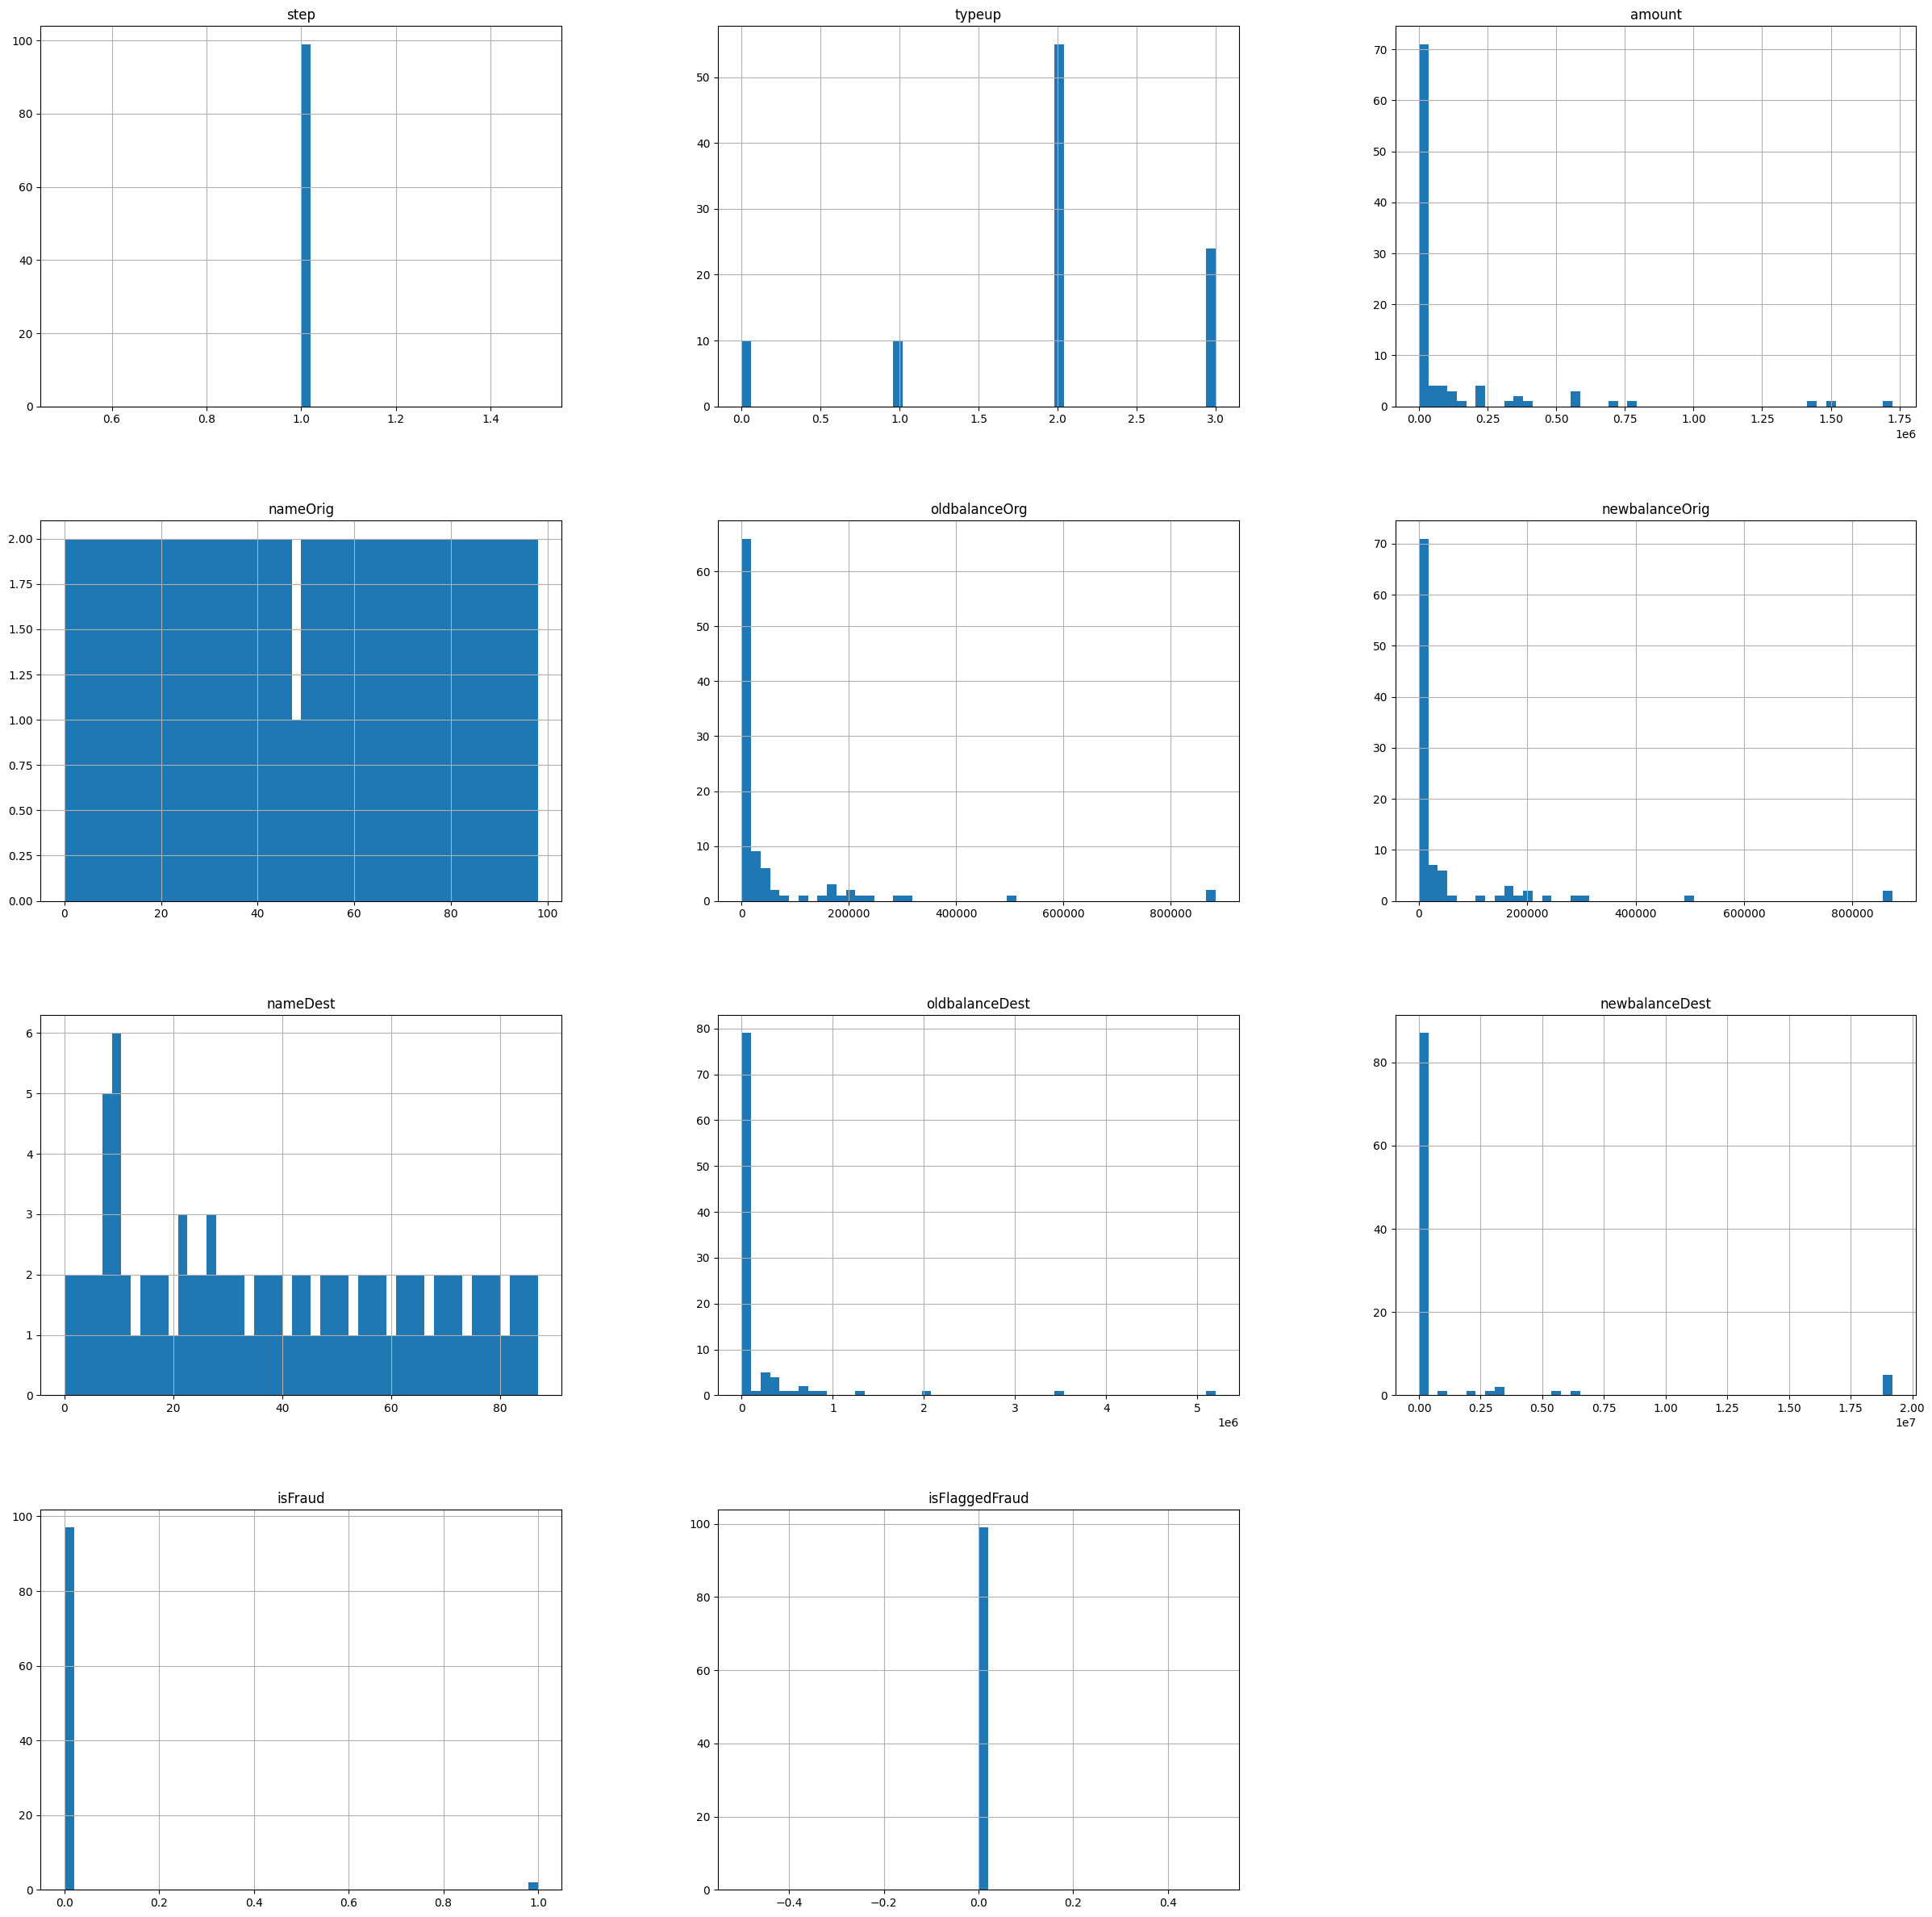

In [81]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()

In [82]:
type = df["typeup"].value_counts()
transactions = type.index
quantity = type.values


figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

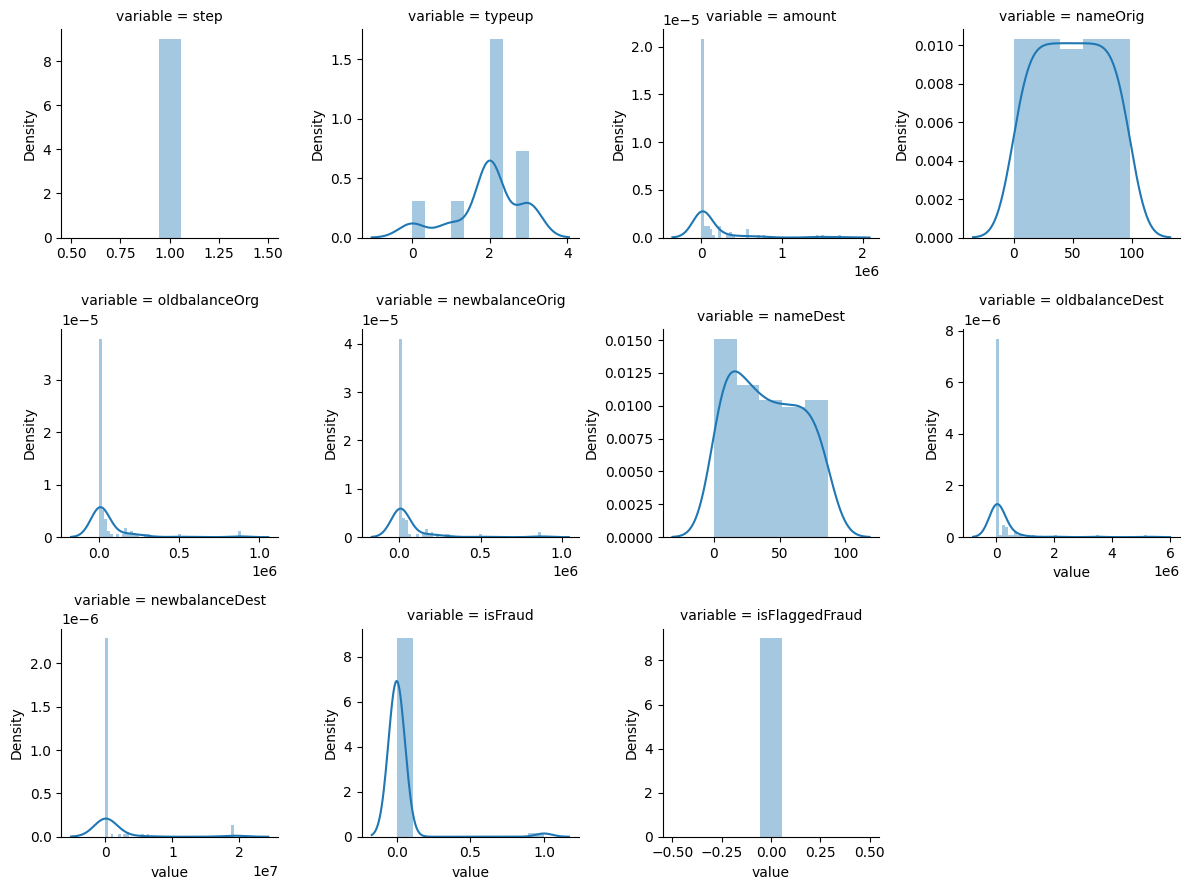

In [ ]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
for i in df.columns:
    print(df[i].skew())

0.0
-0.8408863466383212
3.7952096934860746
0.0
4.321489294875938
4.461727286003423
0.18243109429925863
5.677645499802478
3.8443533414951427
6.925986508080956
0.0


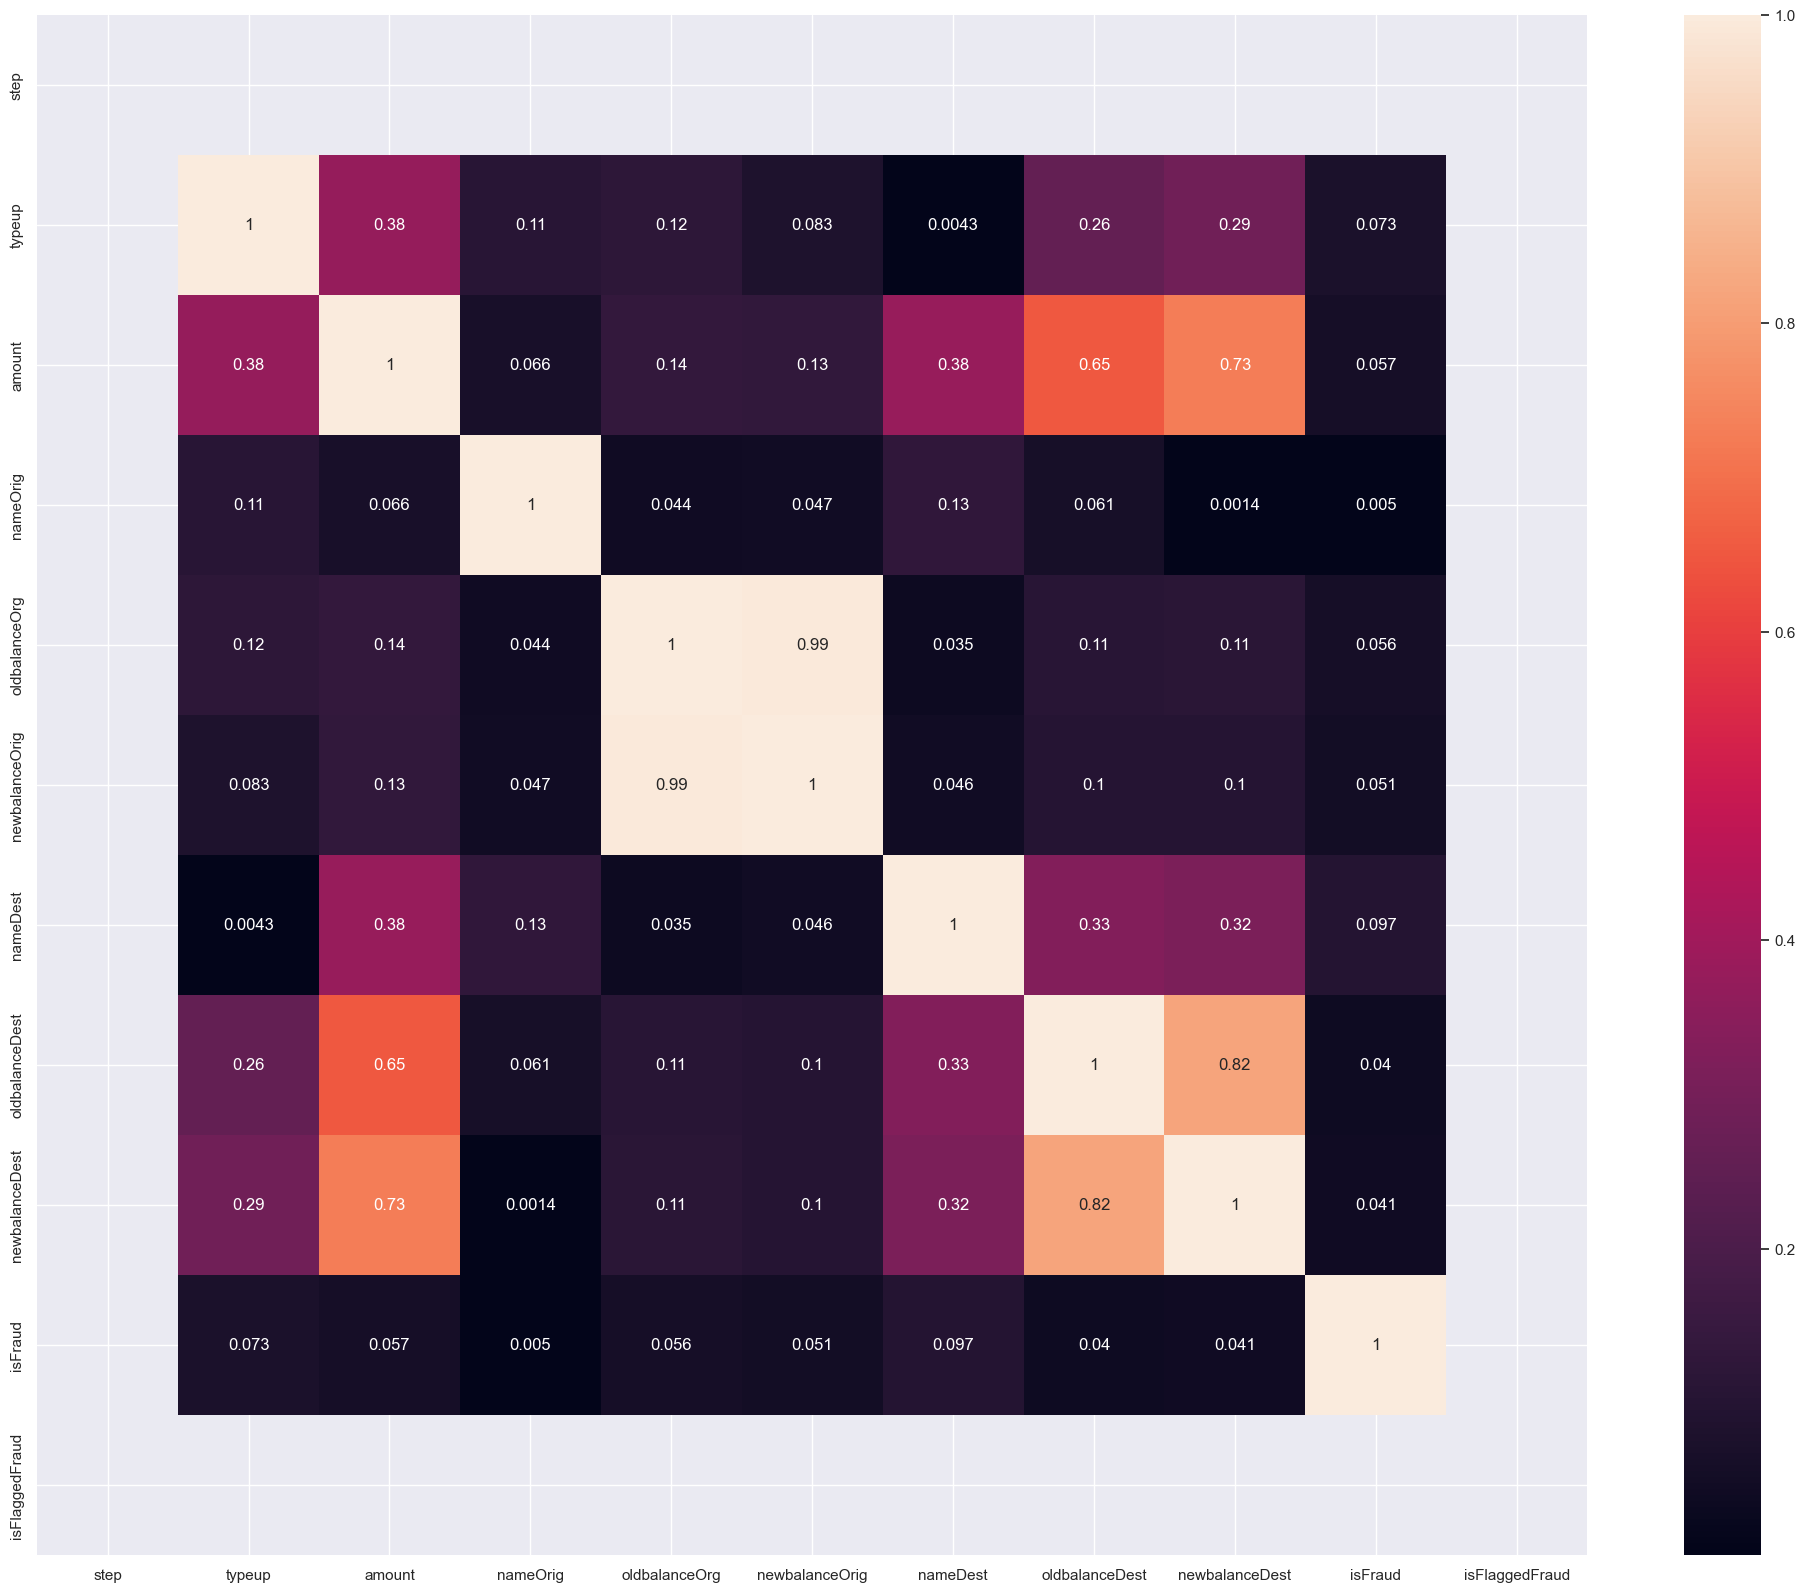

In [ ]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

In [ ]:
corr

,step,typeup,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
typeup,NaN,1.000000,0.375409,0.107788,0.121496,0.082928,0.004251,0.258836,0.289553,0.073157,NaN
amount,NaN,0.375409,1.000000,0.066456,0.136691,0.130485,0.377684,0.650039,0.727320,0.056529,NaN
nameOrig,NaN,0.107788,0.066456,1.000000,0.043663,0.047311,0.129212,0.060796,0.001434,0.005025,NaN
oldbalanceOrg,NaN,0.121496,0.136691,0.043663,1.000000,0.993810,0.034566,0.108045,0.112241,0.056385,NaN
newbalanceOrig,NaN,0.082928,0.130485,0.047311,0.993810,1.000000,0.045836,0.101169,0.101756,0.050857,NaN
nameDest,NaN,0.004251,0.377684,0.129212,0.034566,0.045836,1.000000,0.331046,0.315174,0.097157,NaN
oldbalanceDest,NaN,0.258836,0.650039,0.060796,0.108045,0.101169,0.331046,1.000000,0.818371,0.040139,NaN
newbalanceDest,NaN,0.289553,0.727320,0.001434,0.112241,0.101756,0.315174,0.818371,1.000000,0.041268,NaN
isFraud,NaN,0.073157,0.056529,0.005025,0.056385,0.050857,0.097157,0.040139,0.041268,1.000000,NaN


In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [ ]:

to_drop

['newbalanceOrig', 'newbalanceDest']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            99 non-null     int64  
 1   typeup          99 non-null     int32  
 2   amount          99 non-null     float64
 3   nameOrig        99 non-null     int32  
 4   oldbalanceOrg   99 non-null     float64
 5   newbalanceOrig  99 non-null     float64
 6   nameDest        99 non-null     int32  
 7   oldbalanceDest  99 non-null     float64
 8   newbalanceDest  99 non-null     float64
 9   isFraud         99 non-null     int64  
 10  isFlaggedFraud  99 non-null     int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 7.5 KB


In [ ]:
features = ['step','typeup','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud']

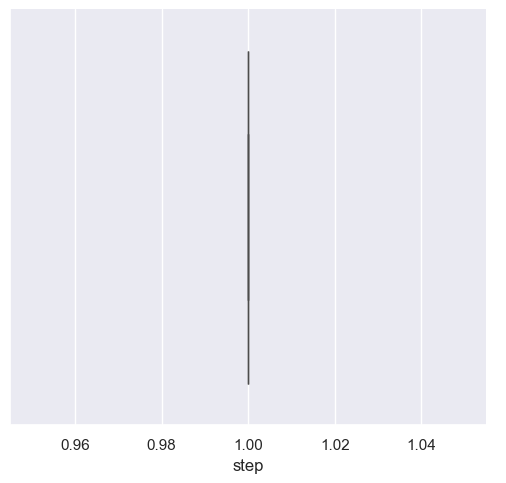

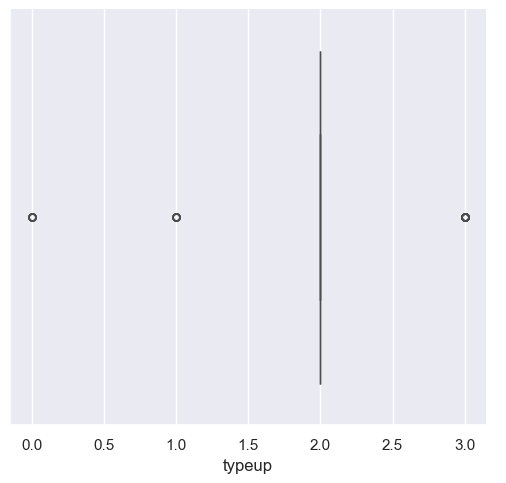

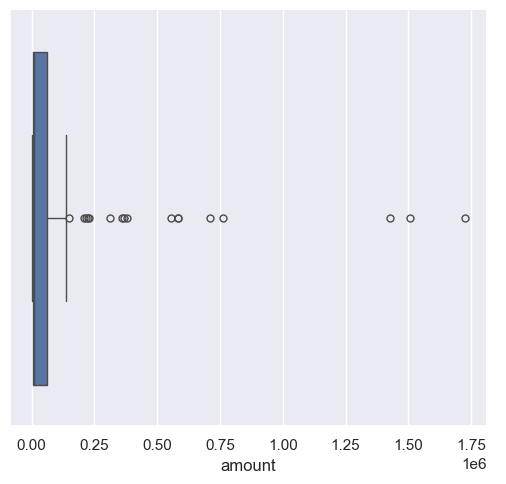

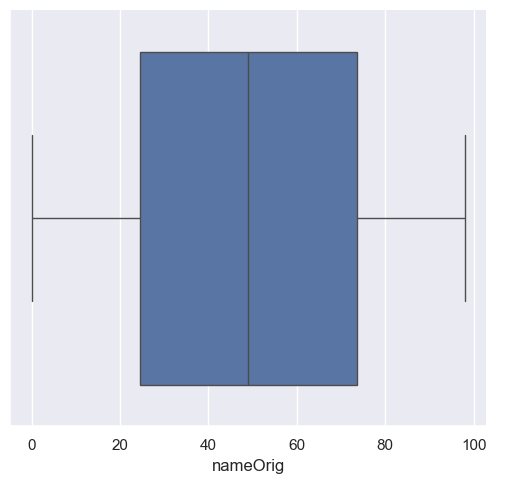

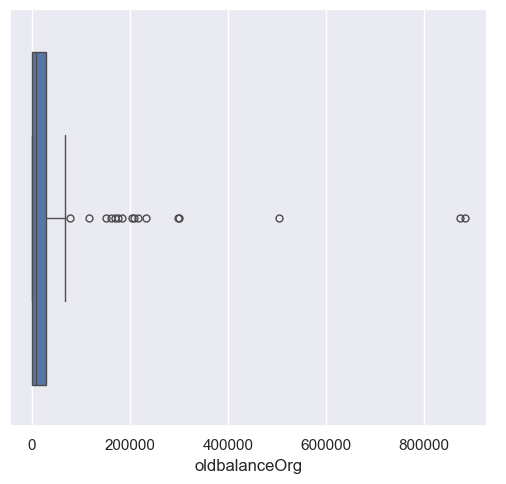

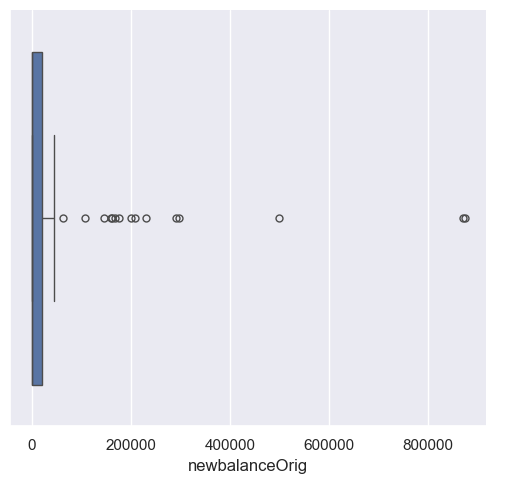

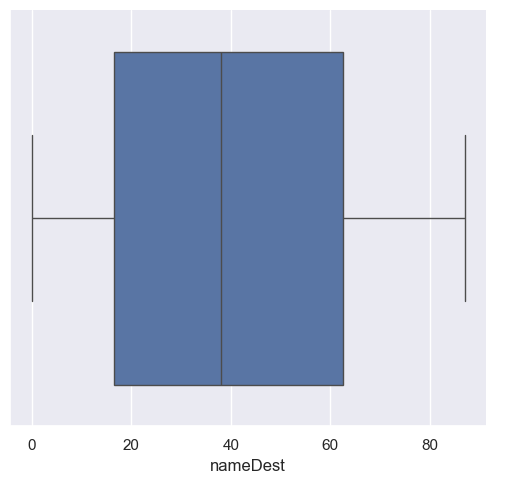

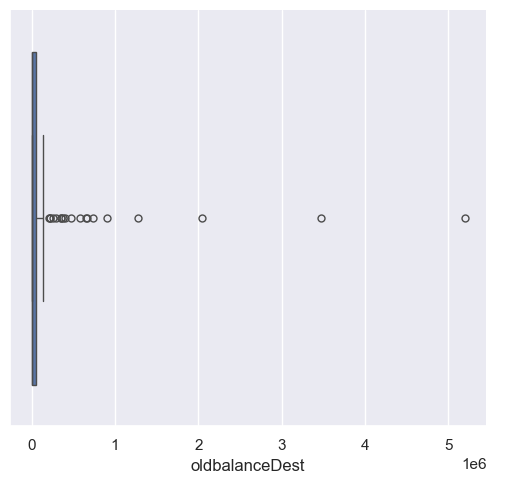

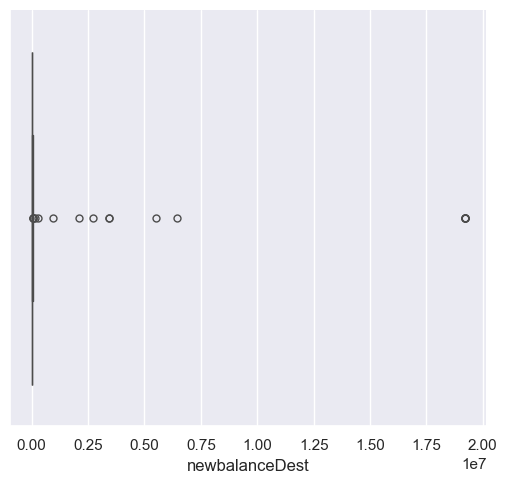

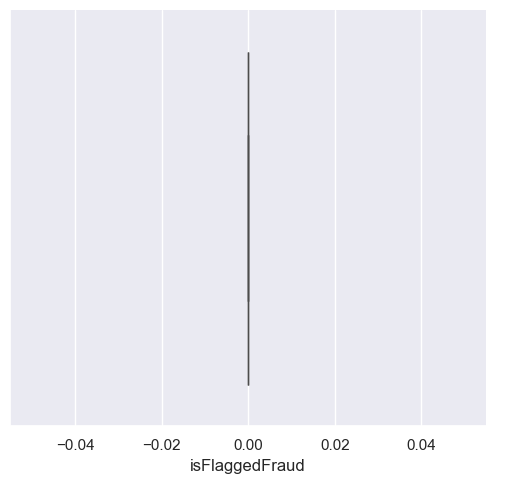

In [ ]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

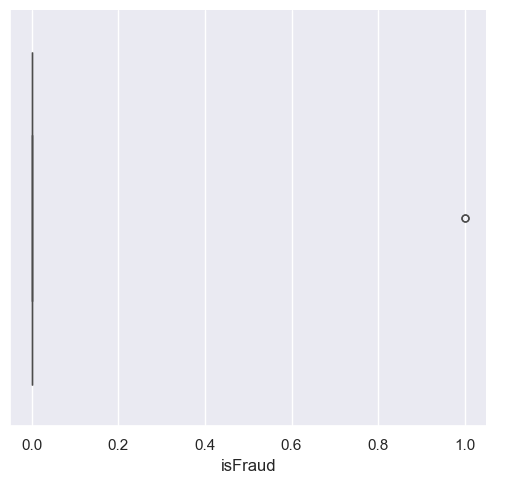

In [ ]:
#for target variable
sns.catplot(data=df, x='isFraud', kind='box')

In [ ]:
# Separate target and feature column in X and y variable

target = 'isFraud'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            99 non-null     int64  
 1   typeup          99 non-null     int32  
 2   amount          99 non-null     float64
 3   nameOrig        99 non-null     int32  
 4   oldbalanceOrg   99 non-null     float64
 5   newbalanceOrig  99 non-null     float64
 6   nameDest        99 non-null     int32  
 7   oldbalanceDest  99 non-null     float64
 8   newbalanceDest  99 non-null     float64
 9   isFlaggedFraud  99 non-null     int64  
dtypes: float64(5), int32(3), int64(2)
memory usage: 6.7 KB


In [ ]:
y

0     0
1     0
2     1
3     1
4     0
     ..
94    0
95    0
96    0
97    0
98    0
Name: isFraud, Length: 99, dtype: int64

In [ ]:
# Check the shape of X and y variable
X.shape, y.shape

((99, 10), (99,))

In [ ]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [ ]:
# Again check the shape of X and y variable
X.shape, y.shape

((99, 10), (99, 1))

In [ ]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79, 10), (20, 10), (79, 1), (20, 1))

In [ ]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)

1.0

In [ ]:
log_R.score(X_test, y_test) 

0.95

In [ ]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.5       , 0.35355339, 0.        , 0.        , 0.5       ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.13535533905932737

In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

In [ ]:

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix


In [ ]:

#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

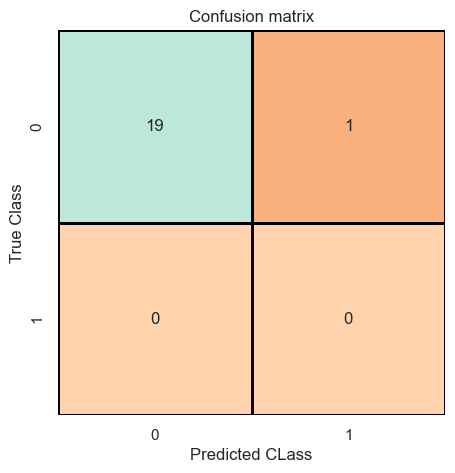

In [ ]:

#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['0', '1'])
plt.yticks(np.arange(2)+.5,['0', '1'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<Axes: >

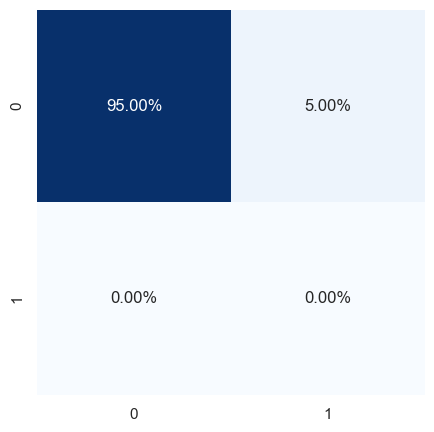

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 0.95
The precision is: 0.0
The recall is: 0.0
The F1-Score is: 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.00      0.00      0.00         0

    accuracy                           0.95        20
   macro avg       0.50      0.47      0.49        20
weighted avg       1.00      0.95      0.97        20



In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.9746835443037974

In [ ]:

#Accuracy of test data
classifier.score(X_test, y_test) 

1.0

In [ ]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores

array([0.35355339, 0.        , 0.        , 0.        , 0.35355339,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.07071067811865475

In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [ ]:

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

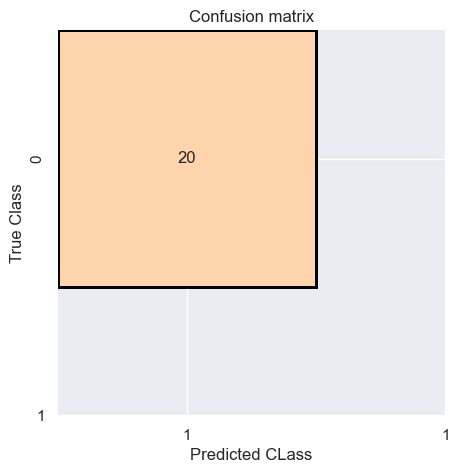

In [ ]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['1', '1'])
plt.yticks(np.arange(2)+.5,['0', '1'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<Axes: >

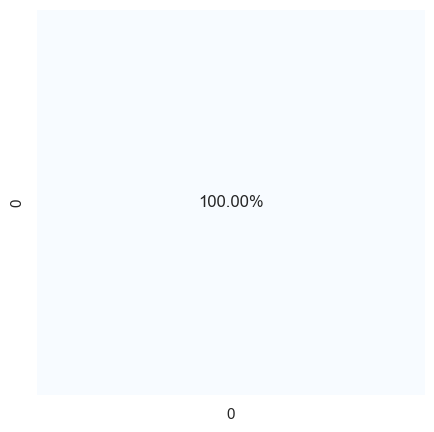

In [ ]:

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

In [ ]:

# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1) 

The model used is KNeighbors Classifier

The accuracy is: 1.0
The precision is: 0.0
The recall is: 0.0
The F1-Score is: 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [ ]:
#Accuracy of test data
clas.score(X_test, y_test)

1.0

In [ ]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores

array([0.35355339, 0.        , 0.        , 0.        , 0.35355339,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.07071067811865475

In [ ]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

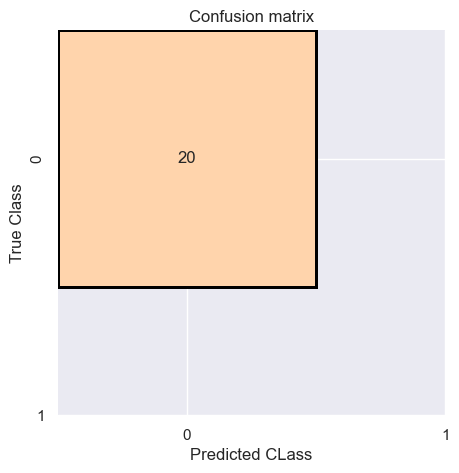

In [ ]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['0', '1'])
plt.yticks(np.arange(2)+.5,['0', '1'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<Axes: >

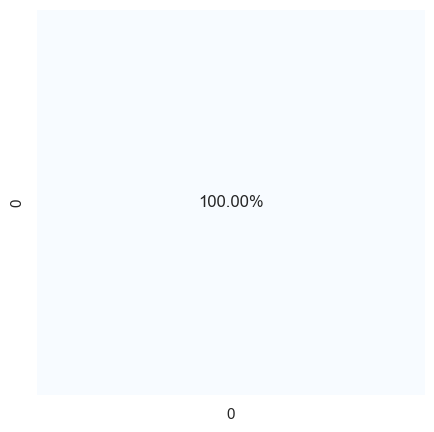

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

In [ ]:

# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 1.0
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Accuracy"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbors',
                  'Random Forest']
cal_metric

,Accuracy
Logistic Regression,0.95
K-nearest Neighbors,1.00
Random Forest,1.00


In [ ]:
import pickle
pickle.dump(log_R , open('Online_payment_fraud_detection_logistic.pkl', 'wb'))
pickle.dump(classifier , open('Online_payment_fraud_detection_Knearest.pkl', 'wb'))
pickle.dump(clas , open('Online_payment_fraud_detection_randomforest.pkl', 'wb'))

In [ ]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Online_payment_fraud_detection_randomforest.pkl', 'rb'))
    isFraud = str(list(pickled_model.predict(features)))
    
    return str(f'The detection is {isFraud}')

In [ ]:
df.head()

,step,typeup,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,6,170136.0,160296.36,63,0.0,0.0,0,0
1,1,2,1864.28,37,21249.0,19384.72,65,0.0,0.0,0,0
2,1,3,181.00,13,181.0,0.00,25,0.0,0.0,1,0
3,1,0,181.00,87,181.0,0.00,20,21182.0,0.0,1,0
4,1,2,11668.14,53,41554.0,29885.86,37,0.0,0.0,0,0


In [ ]:
step = 1
typeup = 3
amount = 181.00
nameOrig = 13
oldbalanceOrg = 181.0
newbalanceOrig = 0.00
nameDest = 25
oldbalanceDest = 21182.0
newbalanceDest = 0.0
isFlaggedFraud = 0

In [ ]:
model_prediction([[step,typeup,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud]])

'The detection is [1]'